In [1]:
import tensorflow as tf 
print(tf.__version__)
print(tf.config.list_physical_devices("GPU"))

2.16.2
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Creating data to view and fit

It's common practice to work on a toy(simple) dataset before moving to your actual problem

In [76]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

X, y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [3]:
#Create dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
print(circles.head())
circles.label.value_counts()

         X0        X1  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0


label
1    500
0    500
Name: count, dtype: int64

Since we're dealing with only two labels (0 or 1) the problem could be treated as a **binary classification** problem. 

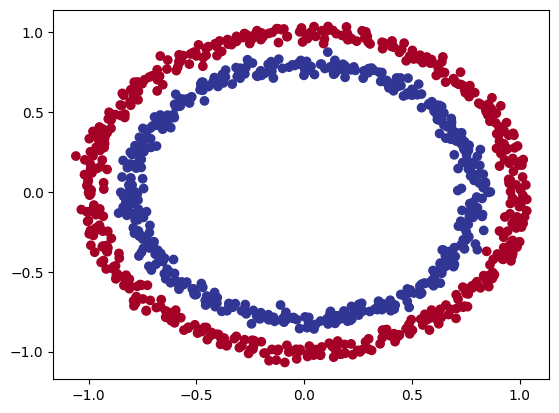

In [4]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes
One of the most common issues you'll run into when building neural networks is shape mismatches.

In [5]:
#Check the sape of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

This means out neural network input shape will has to accept a tensor with at least one dimension being two adn output a tensor with at least one value.

## Steps in modelling

In TensorFlow, there are 3 foundamental steps to create and training a model. 

1. **Creating a model**: The model can be modularly built using the functional or sequential API
* An aleready built model could be imported

2. **Compiling a model**: Definition of the performance metrics and optimizers.
3. **Fitting the model**: Let the model try to find patterns in the data

In [6]:
# Set a random seed for reprodicibility
tf.random.set_seed(42)

# Create model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
]) 

# Compile the model 
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), #binary since we're working with 2 classes(0 & 1)
               optimizer= tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# Fit the model
model_1.fit(X, y, epochs=100)

Epoch 1/100


2026-02-16 10:00:10.483726: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2026-02-16 10:00:10.483763: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2026-02-16 10:00:10.483776: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
2026-02-16 10:00:10.484017: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-02-16 10:00:10.484030: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2026-02-16 10:00:10.703654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4880 - loss: 6.4821
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4990 - loss: 6.3693
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 6.0780
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4820 - loss: 6.8923
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5000 - lo

In [7]:
#Train the model for longer
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5000 - loss: 8.0590


[8.059046745300293, 0.5]

Since we're working on a binary classification problem and our model is getting arround 50% accuracy... it's performing as a random guess.
An improvement of the model is required

## Improve the model

#### Adding an aditional layer

In [8]:
# Set a random seed for reprodicibility
tf.random.set_seed(42)

# Create the model (Add another layer)
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer= tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

#Fit the model
model_2.fit(X,y,epochs=100, verbose=0)
#Evaluate model
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5000 - loss: 0.6933


[0.6932719945907593, 0.5]

The addition of a new layer doesn't improve the predictions of the model

#### Add extra layer and changing oprtimizer

In [9]:
# Set a random seed for reprodicibility
tf.random.set_seed(42)

# Create the model (Add another layer)
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])

#Fit the model
model_3.fit(X,y,epochs=100, verbose=0)

#Evaluate model
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5000 - loss: 0.6942


[0.6941593885421753, 0.5]

In [10]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,965 (15.49 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,644 (10.33 KB)

To visualize our model prediction, let's create a function to:
* Take in a trained model, features(X) and labels(y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones

In [11]:
import numpy as np

In [12]:
#Create a function to visualite the models prediction
def plot_dec_bound(model, X, y):
    """ 
    Plots the decision boundary created by a model predicting on X
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1 , X[:,1].max() - 0.1

    # Create meshgrid
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] #stack 2D arrays together

    #Make predictions 
    y_pred = model.predict(x_in)

    #Check for multi-class
    if len(y_pred[0]) > 1: 
        print("Doing multiclass clasification")
        #We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmay(y_pred,axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step
Doing binary classification


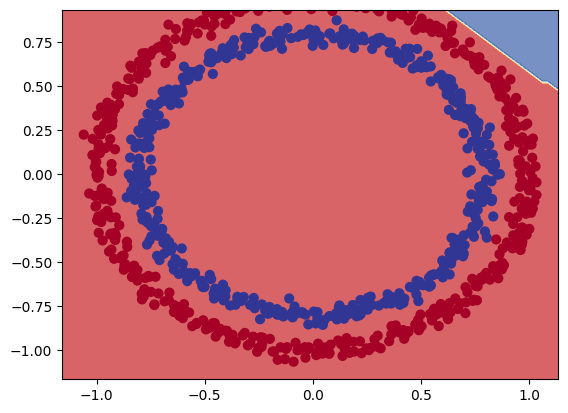

In [13]:
plot_dec_bound(model_2, X=X, y=y)

## The missing piece: Non-linearyty

In [14]:
# Set seed
tf.random.set_seed(42)

#1. Create the model
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

#2. Compile model
model_4.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
#3. Fit model
history = model_4.fit(X,y, epochs=100, verbose=0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step
Doing binary classification


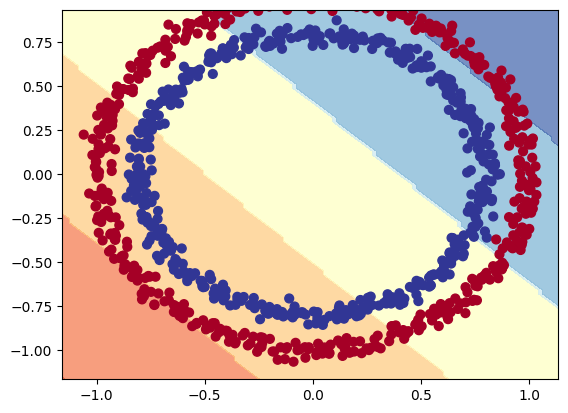

In [15]:
# Check the decision boundary for model_4
plot_dec_bound(model_4, X,y)

In [16]:
# Set seed
tf.random.set_seed(42)

#1. Create the model with non-linear activation 
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="tanh"),
    tf.keras.layers.Dense(100, activation="tanh"),
    tf.keras.layers.Dense(10, activation="tanh"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#2. Compile model
model_5.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
#3. Fit model
history = model_5.fit(X,y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5230 - loss: 0.7007
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4930 - loss: 0.6979
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5550 - loss: 0.6914
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5840 - loss: 0.6870
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5690 - loss: 0.6821
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5740 - loss: 0.6768
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5960 - loss: 0.6700
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6320 - loss: 0.6622
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6520 - loss: 0.6546
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6770 - loss: 0.6472
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7260 - loss: 0.6397
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy:

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Doing binary classification


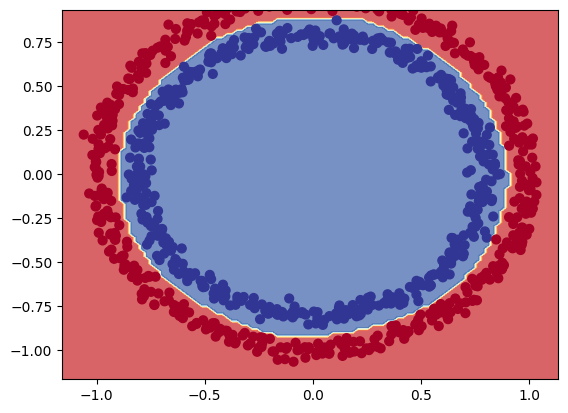

In [17]:
# Check the decision boundary for model_5
plot_dec_bound(model_5, X,y)

In [18]:
model_5.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0079


[0.00794753897935152, 1.0]

The combination of linear and non linear functions is one of the key foundamentals in neural networks.

In [19]:
# Split into train and test set

X_train, X_test = X[:800], X[800:]
y_train, y_test = y[:800], y[800:]

In [20]:
# Set seed
tf.random.set_seed(42)

#1. Create the model with non-linear activation 
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="tanh"),
    tf.keras.layers.Dense(100, activation="tanh"),
    tf.keras.layers.Dense(10, activation="tanh"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#2. Compile model
model_6.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
#3. Fit model
history = model_6.fit(X_train,y_train, epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4875 - loss: 0.6984
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5150 - loss: 0.6968
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5238 - loss: 0.6937
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5263 - loss: 0.6924
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5600 - loss: 0.6892
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6000 - loss: 0.6851
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6237 - loss: 0.6803
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6375 - loss: 0.6750
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6575 - loss: 0.6699
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6750 - loss: 0.6652
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7000 - loss: 0.6604
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy:

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Doing binary classification


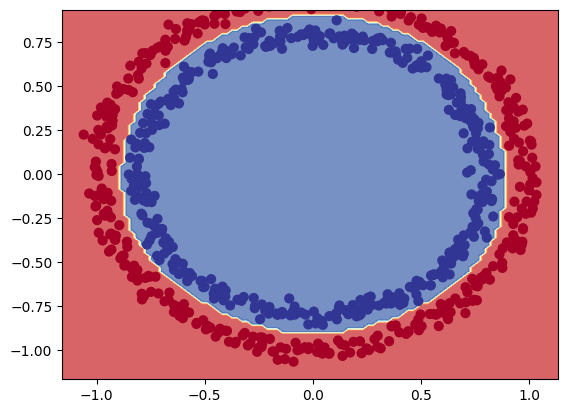

In [21]:
# Check the decision boundary for model_6
plot_dec_bound(model_6, X_train,y_train)

In [22]:
model_6.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0095 


[0.00947392638772726, 1.0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


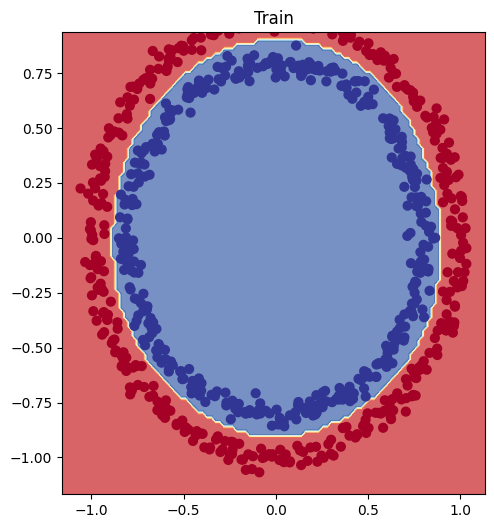

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


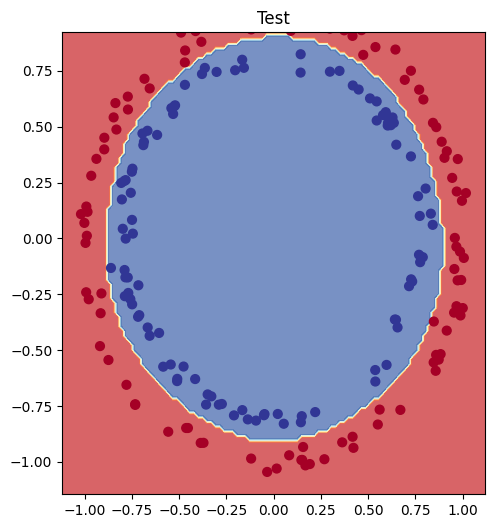

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_dec_bound(model_6, X_train,y_train)
plt.show();
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Test")
plot_dec_bound(model_6, X_test,y_test)
plt.show();

Text(0.5, 1.0, 'Model_6 loss curves')

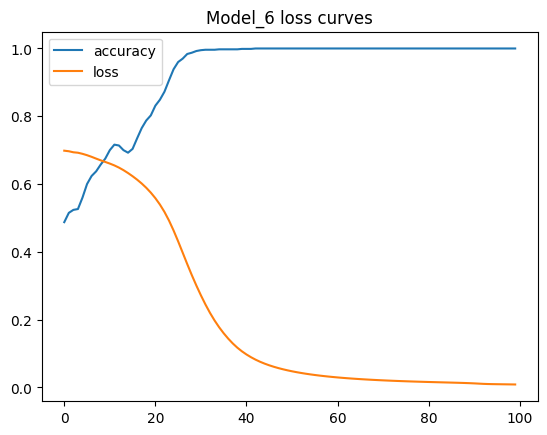

In [24]:
# Plot loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_6 loss curves")

For many problems the loss function going down means the model is improving (the prediction is )

## Finding the best learning rate

To find the ideal learning rate we're going to use the following steps:

* A learning rate callback
* Another model
* A modified loss curve plot

In [25]:
# Set random seed 
tf.random.set_seed(42)

#1. Create the model
model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation="tanh"),
    tf.keras.layers.Dense(10,activation="tanh"),
    tf.keras.layers.Dense(1, activation="sigmoid")
]) 

#2. Compile the model
model_7.compile(loss="binary_crossentropy",
               optimizer="Adam",
               metrics=["accuracy"])

# Create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

# Fit the model
history_7 = model_7.fit(X_train,y_train, epochs= 100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4925 - loss: 0.6974 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5063 - loss: 0.6956 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5113 - loss: 0.6944 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5050 - loss: 0.6935 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5063 - loss: 0.6930 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5200 - loss: 0.6927 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5213 - loss: 0.6926 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5288 - loss: 0.6926 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5288 - loss: 0.6926 - learning_

<Axes: xlabel='epochs'>

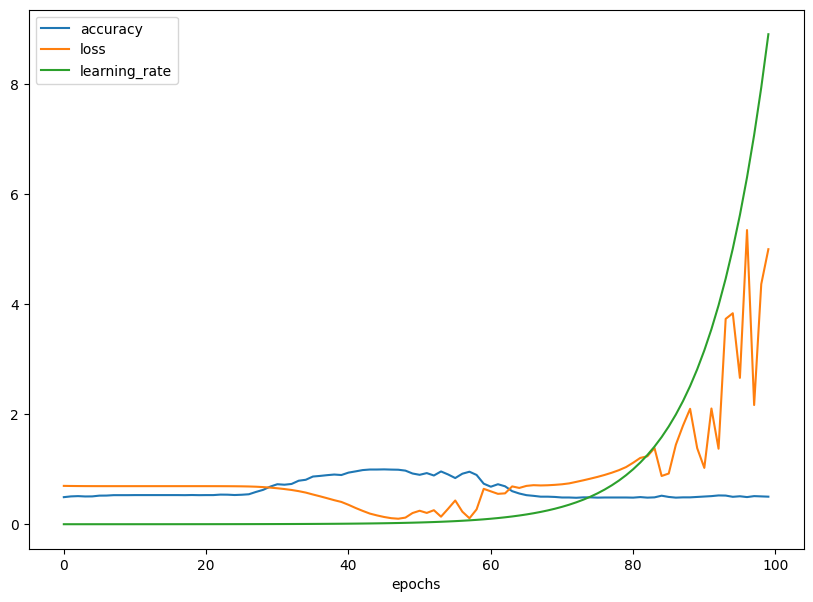

In [26]:
pd.DataFrame(history_7.history).plot(figsize=(10,7), xlabel= "epochs")

## More classification evaluation methods

Alongside visualizing our resuls, there are other evaluation metrics you should be familiar with:
* Accuracy
* Precission
* Recall
* F1
* Confussion matrix
* Classification report(scikit learn)

In [27]:
# Check the accuracy of our model
loss, accuracy = model_7.evaluate(X_test, y_test)
print(f"Model loss on the test set:{loss}")
print(f"Model accuracy on the test set:{(accuracy*100):2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4950 - loss: 6.6077 
Model loss on the test set:6.6077494621276855
Model accuracy on the test set:49.500000%


In [32]:
# Create a confussion metrics
from sklearn.metrics import confusion_matrix

y_preds= model_7.predict(X_test) # Our predictions array has come out in prediction probability (continous values)

# For the confussion matrix we need to convert the prediction to binary values

confusion_matrix(y_test, tf.round(y_preds))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[  0, 101],
       [  0,  99]])

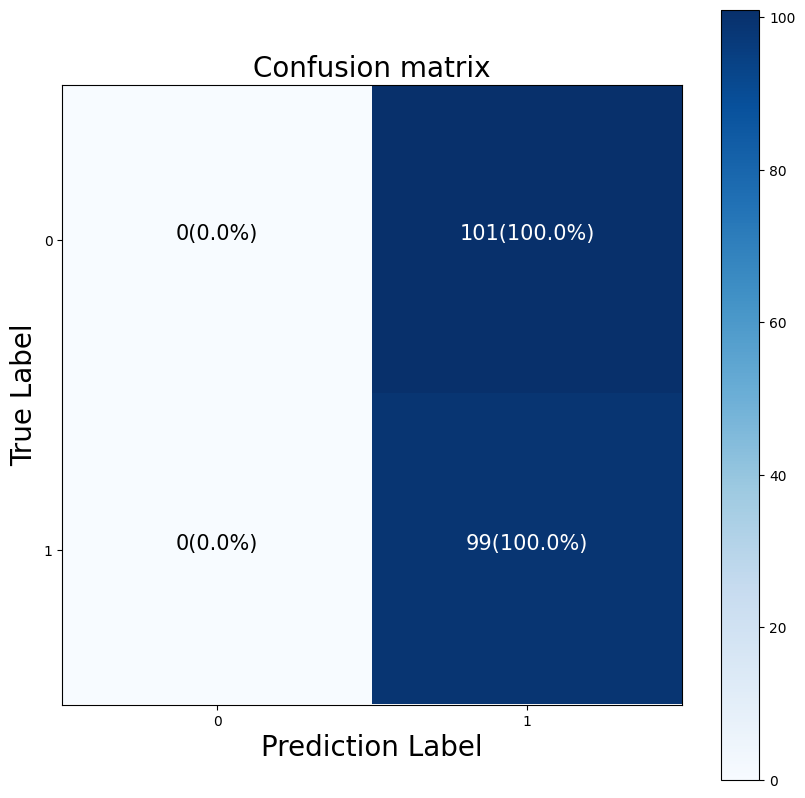

In [53]:
# To prettify the confusion matrix we will make a remix between scikit-learn and TensoFlow
import itertools

# Create a confussion matrix
cm = confusion_matrix(y_test,tf.round(y_preds))
cm_norm=cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # Normalize our confusion matrix
n_classes = cm.shape[0]

# Prettify 
fig, ax = plt.subplots(figsize=(10,10))
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#Create classes
classes = False

if classes: 
    labels= classes
else:
    labels=np.arange(cm.shape[0])

#Label the axis
ax.set(title = "Confusion matrix",
      xlabel = "Prediction Label",
      ylabel = "True Label",
      xticks = np.arange(n_classes),
      yticks = np.arange(n_classes),
      xticklabels = labels,
      yticklabels = labels)

# Set x axis to the bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)


# Set the threshold for different classes 
threshold = (cm.max() + cm.min()) / 2

#Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, f"{cm[i,j]}({cm_norm[i,j]*100:.1f}%)",
            ha = "center",
            color = "white" if cm[i,j] > threshold else "black",
            size=15)

## Working with a larger example (Multi-class clasification)

In [79]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#The data has already been sorted into traing and test sets for us
(train_data, train_labels),(test_data, test_labels) = fashion_mnist.load_data()

In [80]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

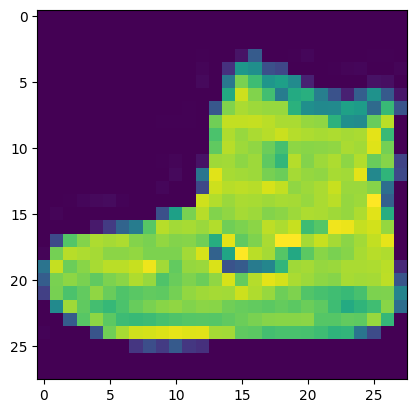

In [81]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [5]:
# Create a small list to index training labels into human-readable

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

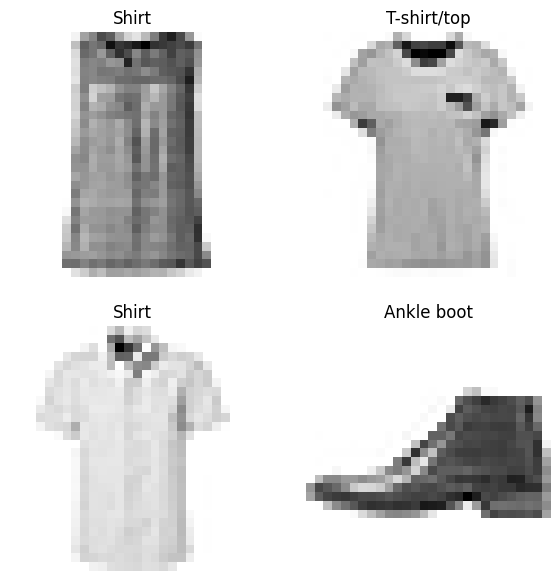

In [6]:
# Plot random example image and its label
import random 
plt.figure(figsize=(7,7))
for i in range(4):
    ax= plt.subplot(2,2, i+1)
    index = random.choice(range(len(train_data))) 
    plt.imshow(train_data[index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[index]])
    plt.axis(False)

## Building a multi-class classification model

We can use a similar architecture to our binary classifier. However, we'll need to tweak few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (One per class)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are integers or floats, use SparseCategoricalCrossentropy() 
* Output layer activation = softmax (not sigmoid) 

In [29]:
# Set random seed
tf.random.set_seed(42)

#1. Create the model 
model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #Our data needs to be flattened from a 28x28 array into a flat vector
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#2. Compile the model
model_8.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer="adam",
               metrics=["accuracy"])

no_norm_history = model_8.fit(train_data,
                      train_labels,
                      batch_size=512,
                      epochs=10,
                      validation_data=(test_data, test_labels))

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1973 - loss: 91.3621 - val_accuracy: 0.3183 - val_loss: 54.9217
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2852 - loss: 40.5432 - val_accuracy: 0.3039 - val_loss: 33.7014
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3207 - loss: 29.3451 - val_accuracy: 0.3372 - val_loss: 24.0817
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3658 - loss: 18.7685 - val_accuracy: 0.3587 - val_loss: 13.6676
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4073 - loss: 11.3221 - val_accuracy: 0.4293 - val_loss: 9.9848
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4396 - loss: 8.7230 - val_accuracy: 0.4547 - val_loss: 7.8629
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4708 - loss: 7.2679 - val_accuracy: 0.4778 - val_loss: 6.7778
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4797 - loss: 6.1009 - val_acc

In [30]:
#Check model summary 

model_8.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [31]:
# Checking the min and max of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks tends to prefer data to be scaled (or normalized), this means they like to have the number in the tensors they try to find patterns between 0 and 1.

In [32]:
train_data_norm = train_data/255
test_data_norm = test_data/255

# Check min and max values of the normalized data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [37]:
# Set random seed
tf.random.set_seed(42)

#1. Create the model 
model_9 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #Our data needs to be flattened from a 28x28 array into a flat vector
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#2. Compile the model
model_9.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer="adam",
               metrics=["accuracy"])

norm_history = model_9.fit(train_data_norm,
                      train_labels,
                      batch_size=512,
                      epochs=10,
                      validation_data=(test_data_norm, test_labels))

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1034 - loss: 2.8498 - val_accuracy: 0.1045 - val_loss: 2.6526
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1298 - loss: 2.4589 - val_accuracy: 0.1688 - val_loss: 2.3154
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1685 - loss: 2.2603 - val_accuracy: 0.1333 - val_loss: 2.2209
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1286 - loss: 2.2075 - val_accuracy: 0.1298 - val_loss: 2.1891
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1516 - loss: 2.1797 - val_accuracy: 0.1666 - val_loss: 2.1622
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1843 - loss: 2.1500 - val_accuracy: 0.1865 - val_loss: 2.1270
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2342 - loss: 2.0958 - val_accuracy: 0.2556 - val_loss: 1.9989
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3614 - loss: 1.6876 - val_accuracy: 0.

<Axes: title={'center': 'Normalized'}>

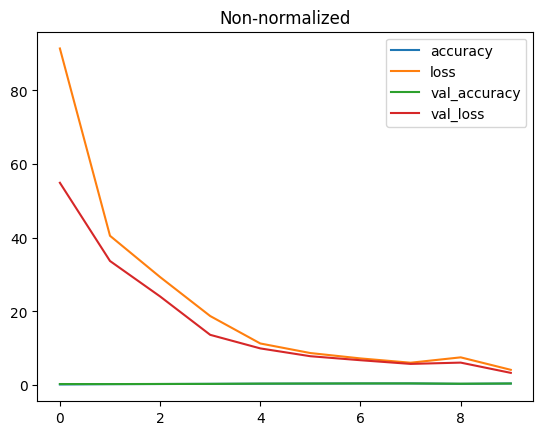

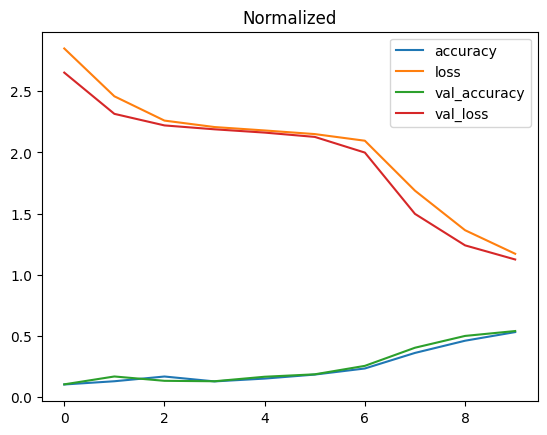

In [38]:
import pandas as pd 
#Plot a non-normalized data loss curves
pd.DataFrame(no_norm_history.history).plot(title="Non-normalized")
#Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized")

The same model with even slightly different data can produce dramatically different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria.

## Finding the idel learning rate

In [59]:
# set a random seed
tf.random.set_seed(42)

#1. Create model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

#2. Compile the model
model_10.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20)) 

#3. Fit the model 
find_lr_history = model_10.fit(train_data_norm,
                      train_labels,
                      batch_size=512,
                      epochs=40,
                      validation_data=(test_data_norm, test_labels),
                      callbacks=[lr_scheduler])

Epoch 1/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3145 - loss: 2.0595 - val_accuracy: 0.3527 - val_loss: 1.7977 - learning_rate: 0.0010
Epoch 2/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3933 - loss: 1.5168 - val_accuracy: 0.5176 - val_loss: 1.2814 - learning_rate: 0.0011
Epoch 3/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5774 - loss: 1.1239 - val_accuracy: 0.6468 - val_loss: 1.0084 - learning_rate: 0.0013
Epoch 4/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6977 - loss: 0.8763 - val_accuracy: 0.7216 - val_loss: 0.7961 - learning_rate: 0.0014
Epoch 5/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7353 - loss: 0.7402 - val_accuracy: 0.7405 - val_loss: 0.7151 - learning_rate: 0.0016
Epoch 6/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7534 - loss: 0.6806 - val_accuracy: 0.7591 - val_loss: 0.6744 - learning_rate: 0.0018
Epoch 7/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7672 - loss: 0.6477 - 

tf.Tensor(
[0.001      0.00112202 0.00125893 0.00141254 0.00158489 0.00177828
 0.00199526 0.00223872 0.00251189 0.00281838 0.00316228 0.00354813
 0.00398107 0.00446684 0.00501187 0.00562341 0.00630957 0.00707946
 0.00794328 0.00891251 0.01       0.01122018 0.01258925 0.01412538
 0.01584893 0.01778279 0.01995262 0.02238721 0.02511886 0.02818383
 0.03162278 0.03548134 0.03981072 0.04466836 0.05011872 0.05623413
 0.06309573 0.07079458 0.07943282 0.08912509], shape=(40,), dtype=float64)


Text(0.5, 1.0, 'Finding the ideal learining rate')

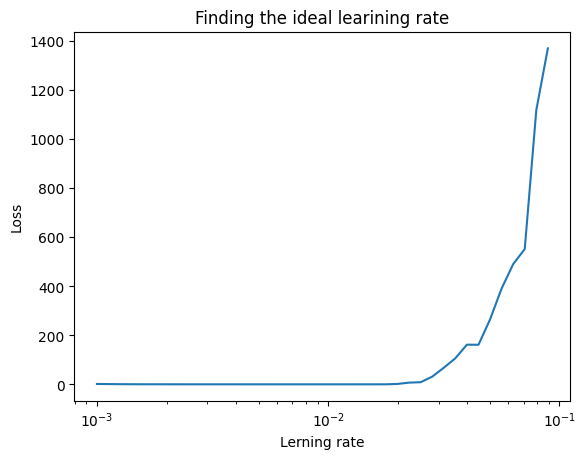

In [60]:
#Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
print(lrs)
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Lerning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learining rate")

In [63]:
# set a random seed
tf.random.set_seed(42)

#1. Create model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

#2. Compile the model
model_10.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])

#3. Fit the model 
opt_lr_history = model_10.fit(train_data_norm,
                      train_labels,
                      batch_size=512,
                      epochs=40,
                      validation_data=(test_data_norm, test_labels))

Epoch 1/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2185 - loss: 1.9102 - val_accuracy: 0.2891 - val_loss: 1.6096
Epoch 2/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4768 - loss: 1.3178 - val_accuracy: 0.5786 - val_loss: 1.1259
Epoch 3/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6348 - loss: 1.0018 - val_accuracy: 0.6626 - val_loss: 0.9471
Epoch 4/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6995 - loss: 0.8713 - val_accuracy: 0.7082 - val_loss: 0.8534
Epoch 5/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7261 - loss: 0.7993 - val_accuracy: 0.7256 - val_loss: 0.8069
Epoch 6/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7370 - loss: 0.7683 - val_accuracy: 0.7336 - val_loss: 0.7864
Epoch 7/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7431 - loss: 0.7515 - val_accuracy: 0.7388 - val_loss: 0.7728
Epoch 8/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7538 - loss: 0.7366 - val_accuracy: 0.

<Axes: title={'center': 'Optimized learning rate'}>

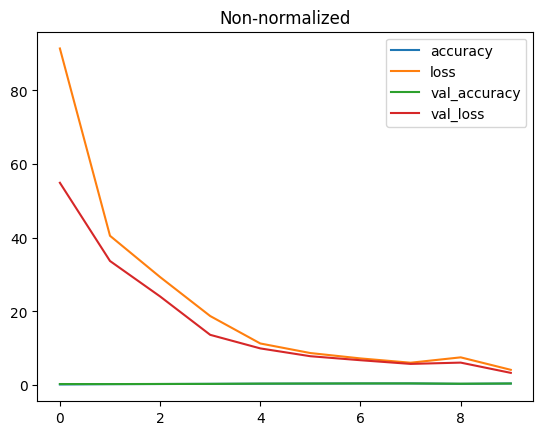

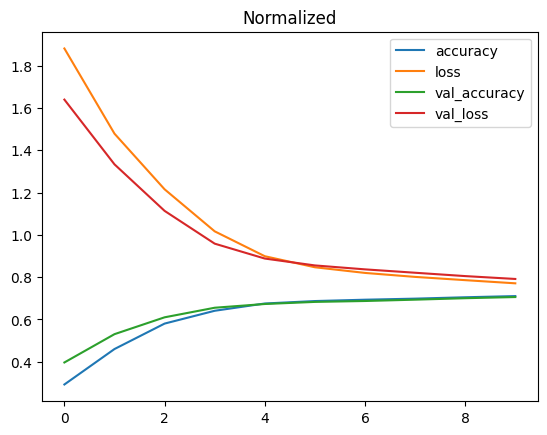

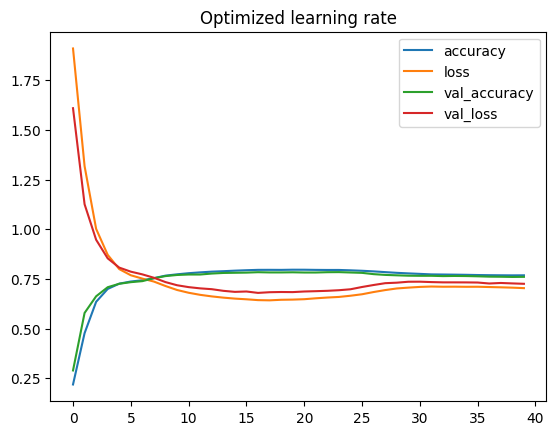

In [64]:
#Plot a non-normalized data loss curves
pd.DataFrame(no_norm_history.history).plot(title="Non-normalized")
#Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized")
#Plot optimized learning_rate data loss curves
pd.DataFrame(opt_lr_history.history).plot(title="Optimized learning rate")

## Evaluate out multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such a confsion matrix)
* Asses some of its predictions (through visualizations)
* Imporove its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

In [87]:
# Create a confusion matrix
# To prettify the confusion matrix we will make a remix between scikit-learn and TensoFlow
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=20):
    # Create a confussion matrix
    cm = confusion_matrix(y_true,tf.round(y_pred))
    cm_norm=cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # Normalize our confusion matrix
    n_classes = cm.shape[0]
    
    # Prettify 
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    #Set labels to be classes
    if classes: 
        labels= classes
    else:
        labels=np.arange(cm.shape[0])
    
    #Label the axis
    ax.set(title = "Confusion matrix",
          xlabel = "Prediction Label",
          ylabel = "True Label",
          xticks = np.arange(n_classes),
          yticks = np.arange(n_classes),
          xticklabels = labels,
          yticklabels = labels)
    
    # Set x axis to the bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    
    #Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)
    
    
    # Set the threshold for different classes 
    threshold = (cm.max() + cm.min()) / 2
    
    #Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, f"{cm[i,j]}({cm_norm[i,j]*100:.1f}%)",
                ha = "center",
                color = "white" if cm[i,j] > threshold else "black",
                size=15)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


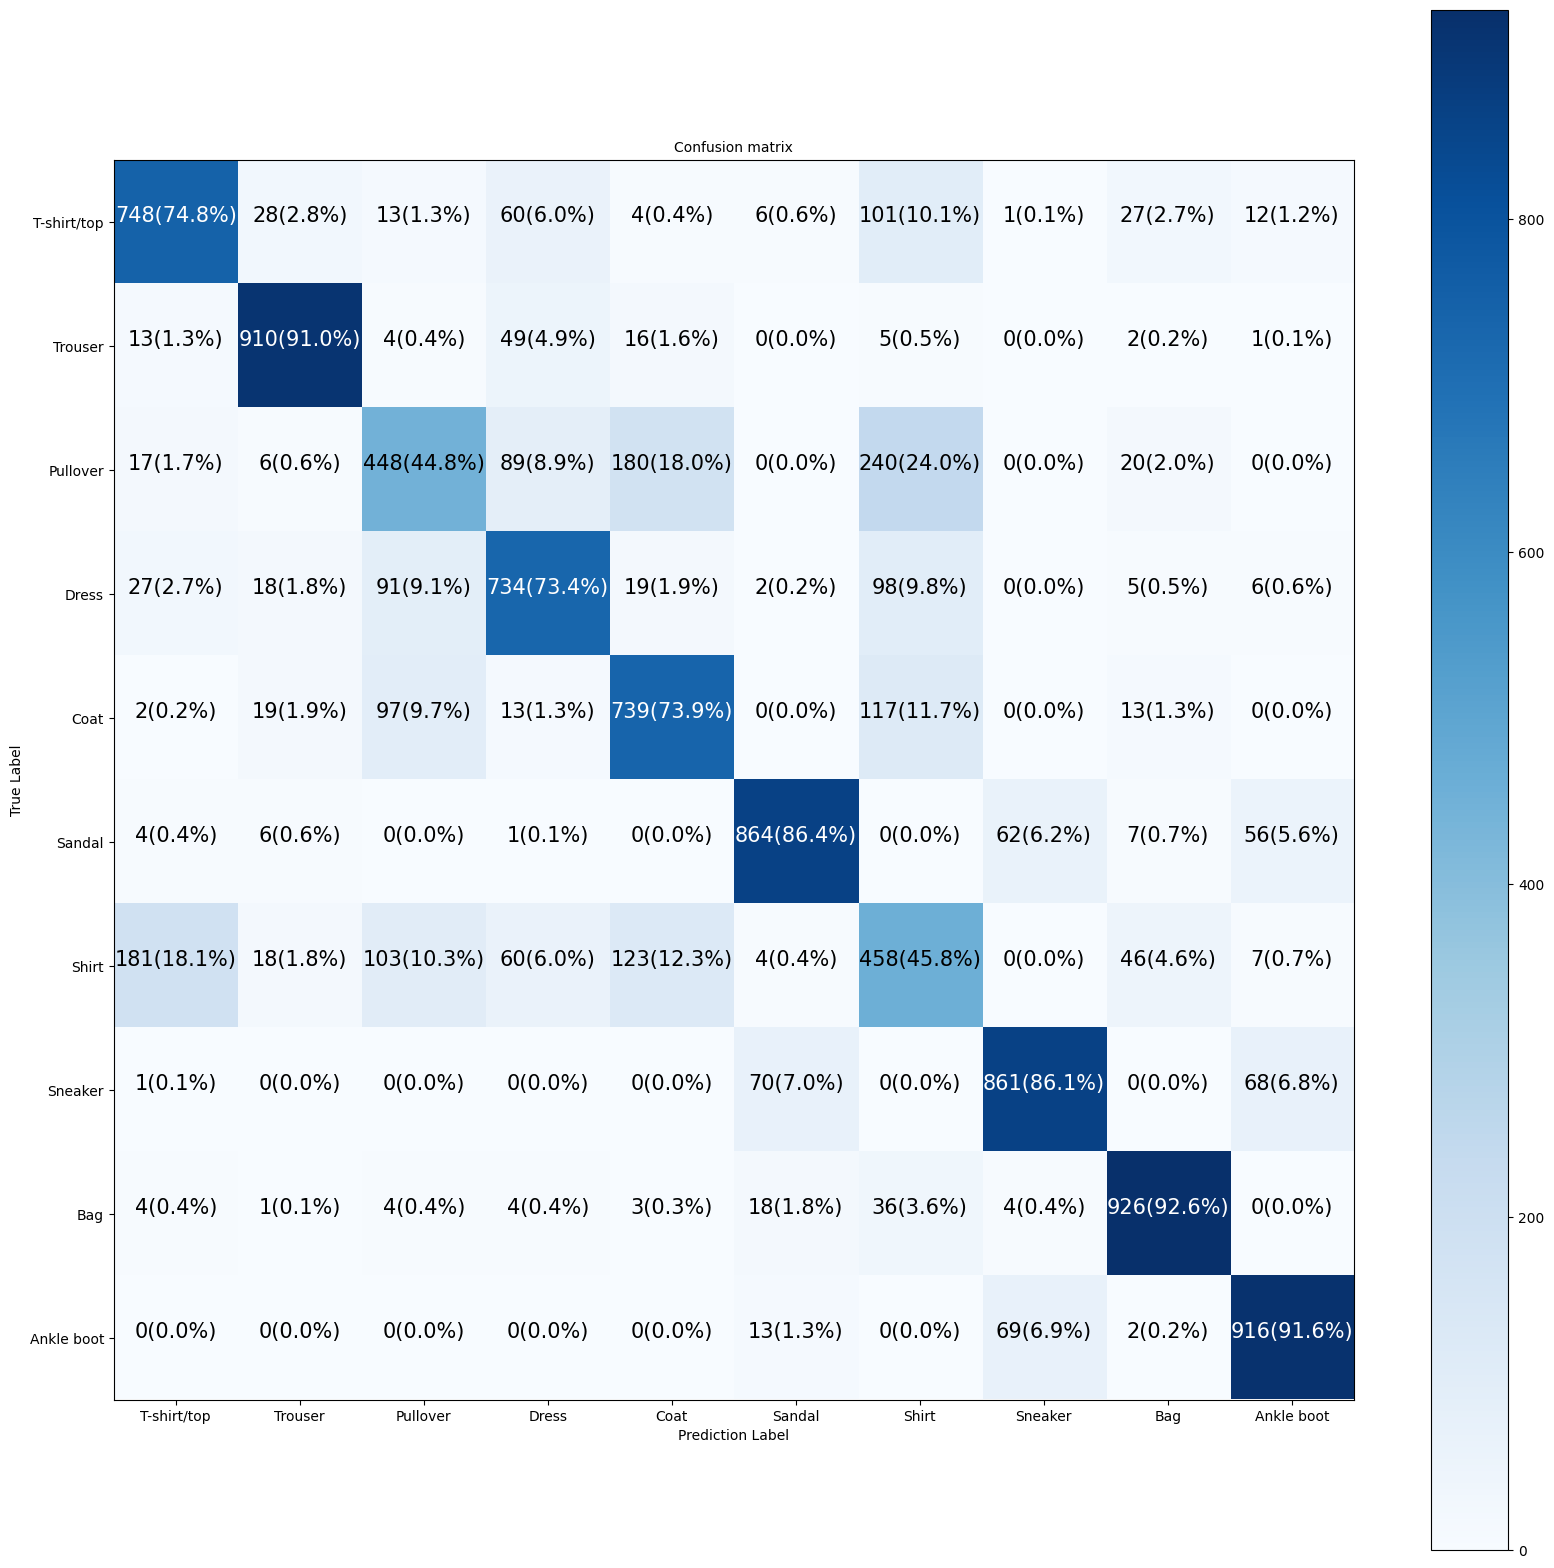

In [89]:
# Make some predictions with our model
y_probs =  model_10.predict(test_data_norm)
#Convert all the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

make_confusion_matrix(y_true=test_labels,
                     y_pred= y_preds,
                     classes=class_names,
                     figsize=(20,20),
                     text_size=10)

Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models. 

In [117]:
import random
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it and labels it with a prediction and a true label.
    """
    # 1. Pick a random index
    i = random.randint(0, len(images) - 1) # Added -1 to avoid IndexError

    # 2. Get the target image and make a prediction
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    
    # 3. Derive the indices and the human-readable names
    pred_idx = pred_probs.argmax()
    true_idx = true_labels[i]
    
    pred_label = classes[pred_idx]
    true_label = classes[true_idx]

    # 4. Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # 5. Check if prediction is correct (compare indices, not strings vs ints)
    color = "green" if pred_idx == true_idx else "red"

    # 6. Add xlabel information
    plt.xlabel(f"Pred: {pred_label} {100*tf.reduce_max(pred_probs):2.0f}% (True: {true_label})", 
               color=color)
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


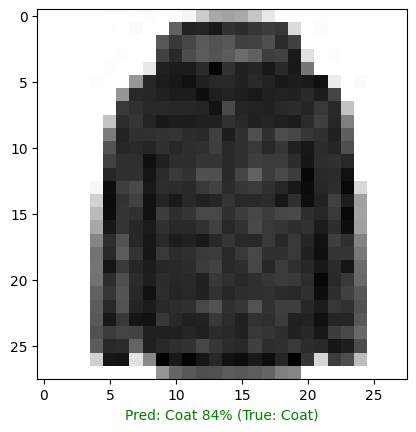

In [129]:
plot_random_image(model_10, 
                  images=test_data_norm, #always make predictions ont the same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

## What patterms is our model learning?

In [139]:
# Get the patterns of a layer in our network 
weigths, biases = model_10.layers[1].get_weights()

#Shapes
print(weigths, weigths.shape, "\n") #It has one value per data point 
print(biases, biases.shape) #It has one value per hidden neuron

[[-0.329648   -0.2959962  -0.66487217 -0.49966782]
 [-0.28375494 -0.08352562 -0.49932757 -0.23779595]
 [-0.60314447 -0.01564273 -0.8613586  -0.7652616 ]
 ...
 [ 0.42248487  0.42985916  0.4722763  -0.35234213]
 [ 0.2696703  -0.26688537  0.35235697 -0.51668125]
 [-0.37554005 -0.25263217 -0.4122965  -0.5880657 ]] (784, 4) 

[1.2885948  0.50889003 0.19324    0.6790107 ] (4,)


Every neuron has a bias vector. Each of these is paired with a weigths matrix.

The bias vector gets initialized as zeros (at least on the Dense layers).

The bias vector dictates how much the patterns withtin the corresponding weights metrix should influence the next layer.